In [8]:
# Imports
from network import HopfieldNetwork
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Testing simple single pitch storage and denoising

We will start by trying to store an a440 pitch into the Hopfield network. We will then add noise to the pitch and see if the Hopfield network can recover the initial pitch.

### Extracting audio data

/var/folders/n5/xwtct4t51_zc76hz3mm3bcmc0000gn/T/ipykernel_2769/352874952.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(file_path)


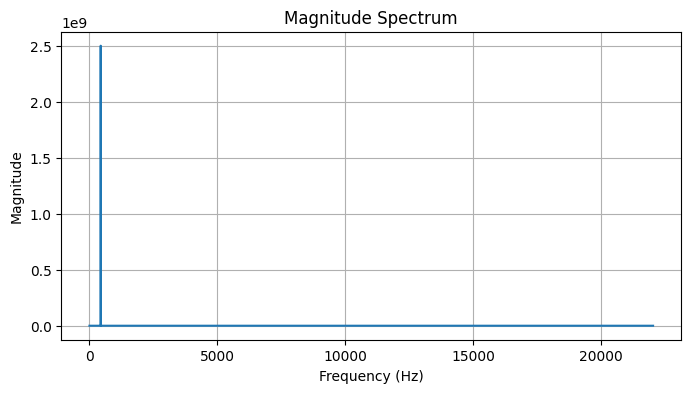

In [9]:
file_path = './audio/Sine_wave_440.wav'

# Read the wav file
sample_rate, data = wavfile.read(file_path)

# Take the fourier transform of the wav file
fft_result = np.fft.fft(data)

# Frequencies corresponding to the FFT result
frequencies = np.fft.fftfreq(len(fft_result), 1/sample_rate)

# Plot the magnitude spectrum
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(frequencies)//2])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

Above we can see a plot of the fourier transform, with a clear spike at 440Hz

### Training the Hopfield network

The fourier data is essentially 1D - the frequency is an index for an array of magnitudes. To convert between indices and frequencies, we can use the following formula:

$$Index = \left \lfloor \frac{Frequency \times N}{Sample Rate} \right \rfloor$$

Where $N$ is the size of the fourier transform data.

Since we only want to focus on the positive frequencies, we will take the first half of the fourier transform array.

In [10]:
# Get the data we want to memorize
from tqdm import tqdm


positive_fft = np.abs(fft_result)[:len(frequencies)//2]

# Initialize the Hopfield network
model = HopfieldNetwork()

train_data = [positive_fft]
num_data = len(train_data)
num_neurons = train_data[0].shape[0]
print(num_neurons)

W = np.zeros((num_neurons, num_neurons))
print(W)

rho = np.sum([np.sum(t) for t in train_data]) / (num_data * num_neurons)
print(rho)

t = train_data[0] - rho
print(t)

print(type(train_data[0][0]))
print(train_data[0][0])
print(train_data[0][0].astype(np.float32))

print(sample_rate)

#print(np.outer(t, t))

# Hebb rule
'''for i in tqdm(range(num_data)):
    t = train_data[i] - rho
    W += np.outer(t, t)'''

# Train the weights in the network
#model.train_weights([positive_fft])

110250
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
22877.098622507096
[-22586.09862251 -22651.8193007  -22594.2553383  ... -22688.86239439
 -22534.64537877 -22423.02264004]
<class 'numpy.float64'>
291.0
291.0
44100


'for i in tqdm(range(num_data)):\n    t = train_data[i] - rho\n    W += np.outer(t, t)'

In [11]:
saved_thing = np.outer(t, t)